In [4]:
library(rstan)
library(brms)
library(here)
library(ggplot2)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [6]:
interaction_1 <- read.csv(here("data", "3-10-1-interaction-1.csv"))
head(interaction_1, n = 3)


,sales,publicity,bargen
,<dbl>,<chr>,<chr>
1,87.5,not,not
2,103.7,not,not
3,83.3,not,not


In [3]:
model.matrix(sales ~ publicity * bargen, interaction_1)


ERROR: Error in eval(expr, envir, enclos): オブジェクト 'interaction_1' がありません


In [7]:
# モデル化
interaction_brm_1 <- brm(
  formula = sales ~ publicity * bargen,
  family = gaussian(link = "identity"),
  data = interaction_1,
  seed = 1,
  prior = c(
    set_prior("", class = "Intercept"),
    set_prior("", class = "sigma")
  )
)


Compiling Stan program...

Start sampling



In [5]:
interaction_brm_1


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ publicity * bargen 
   Data: interaction_1 (Number of observations: 100) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
                                         Estimate Est.Error l-95% CI u-95% CI
Intercept                                  103.47      3.68    96.46   110.62
publicityto_implement                        9.86      5.24    -0.59    19.78
bargento_implement                          27.20      5.15    16.90    37.22
publicityto_implement:bargento_implement    20.91      7.36     5.99    35.56
                                         Rhat Bulk_ESS Tail_ESS
Intercept                                1.00     2534     3430
publicityto_implement                    1.00     2187     2412
bargento_implement                       1.00     2026     2946
publicityto_implement:bargento_implement 1.00     1893     2375

Furt

In [10]:
# 説明変数を作る
newdata_1 <- data.frame(
  publicity = rep(c("not", "to_implement"), 2),
  bargen = rep(c("not", "to_implement"), each = 2)
)
newdata_1


publicity,bargen
<chr>,<chr>
not,not
to_implement,not
not,to_implement
to_implement,to_implement


In [11]:
# 予測
round(fitted(interaction_brm_1, newdata_1), 2)


Estimate,Est.Error,Q2.5,Q97.5
103.47,3.68,96.46,110.62
113.33,3.77,105.79,120.69
130.67,3.58,123.61,137.48
161.44,3.73,154.18,168.87


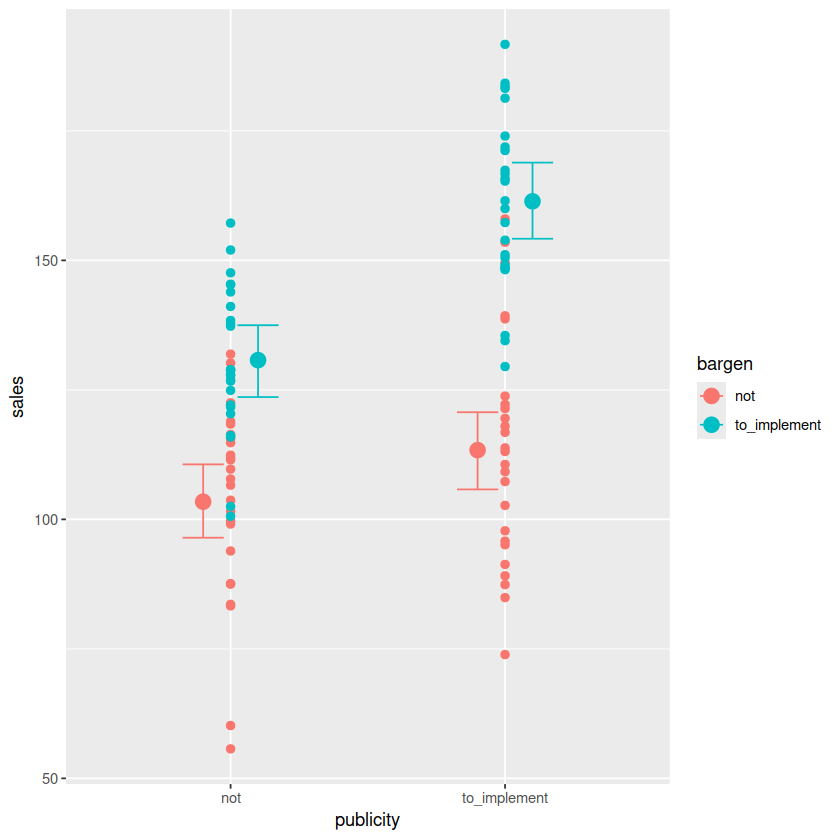

In [13]:
# モデルの図示
eff_1 <- conditional_effects(
  interaction_brm_1,
  effects = "publicity:bargen"
)
plot(eff_1, points = T)


In [16]:
# 分析対象のデータ
interaction_2 <- read.csv(here("data", "3-10-2-interaction-2.csv"))
head(interaction_2, n = 3)


,sales,publicity,temperature
,<dbl>,<chr>,<dbl>
1,74.0,not,8.0
2,60.2,not,11.2
3,91.2,not,17.2


In [17]:
# モデル化
interaction_brms_2 <- brm(
  formula = sales ~ publicity * temperature,
  family = gaussian(link = "identity"),
  data = interaction_2,
  seed = 1,
  prior = c(
    set_prior("", class = "Intercept"),
    set_prior("", class = "sigma")
  )
)


Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [18]:
# MCMCの結果確認
interaction_brms_2


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ publicity * temperature 
   Data: interaction_2 (Number of observations: 100) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
                                  Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                            43.08      6.08    31.48    54.77 1.00
publicityto_implement                17.24      8.56     0.38    34.14 1.00
temperature                           2.58      0.34     1.93     3.26 1.00
publicityto_implement:temperature     4.19      0.49     3.24     5.15 1.00
                                  Bulk_ESS Tail_ESS
Intercept                             2050     2551
publicityto_implement                 1650     1966
temperature                           1933     2466
publicityto_implement:temperature     1591     2015

Further Distributional Parameters:
      Estimate Est.Error l-95% CI 

In [21]:
# 説明変数を作る
newdata_2 <- data.frame(
  publicity = rep(c("not", "to_implement"), each = 2),
  temperature = c(0, 10, 0, 10)
)
newdata_2


publicity,temperature
<chr>,<dbl>
not,0
not,10
to_implement,0
to_implement,10


In [22]:
# 予測
round(fitted(interaction_brms_2, newdata_2), 2)


Estimate,Est.Error,Q2.5,Q97.5
43.08,6.08,31.48,54.77
68.91,3.39,62.27,75.59
60.32,5.89,48.46,72.21
128.08,3.24,121.70,134.62


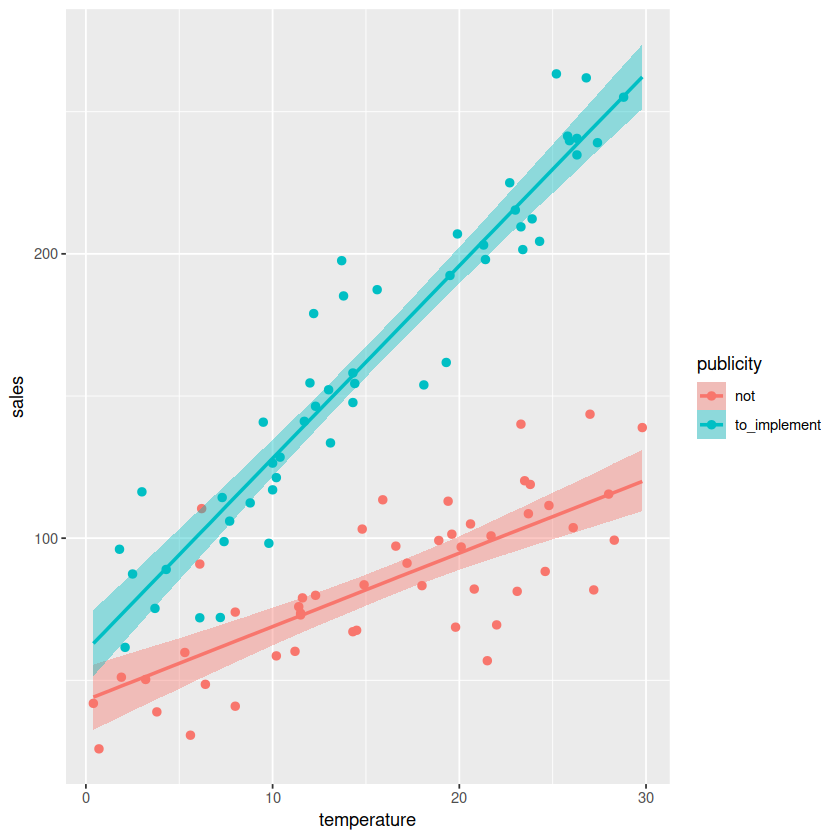

In [23]:
# 回帰直線の図示
eff_2 <- conditional_effects(interaction_brms_2, effects = "temperature:publicity")
plot(eff_2, points = T)


In [24]:
# 分析対象のデータ
interaction_3 <- read.csv(here("data", "3-10-3-interaction-3.csv"))
head(interaction_3, n = 3)


,sales,product,clerk
,<dbl>,<int>,<int>
1,142.5,17,3
2,193.2,38,4
3,376.7,33,9


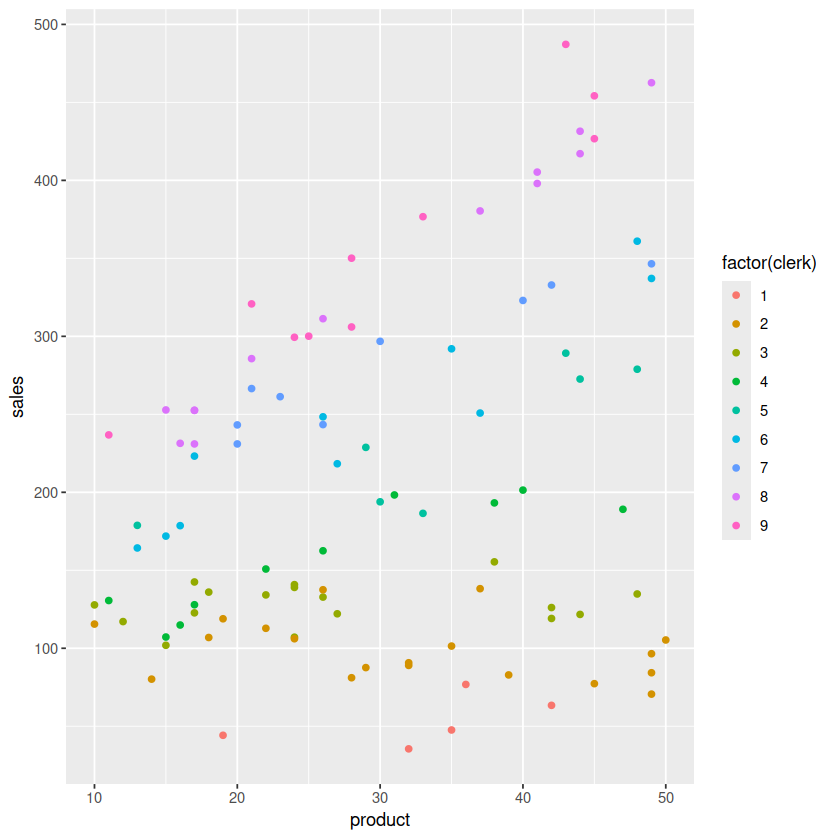

In [25]:
# データの図示
ggplot(
  data = interaction_3,
  aes(x = product, y = sales, color = factor(clerk))
) +
  geom_point()


In [27]:
# モデル化
interaction_brms_3 <- brm(
  formula = sales ~ product * clerk,
  family = gaussian(link = "identity"),
  data = interaction_3,
  seed = 1,
  prior = c(
    set_prior("", class = "Intercept"),
    set_prior("", class = "sigma")
  )
)


Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [28]:
# MCMCの結果の確認
interaction_brms_3


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ product * clerk 
   Data: interaction_3 (Number of observations: 100) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        89.01     12.13    65.89   113.21 1.00     1510     1997
product          -2.28      0.37    -3.02    -1.56 1.00     1457     1928
clerk             6.35      2.22     2.02    10.74 1.00     1417     1807
product:clerk     1.06      0.07     0.93     1.19 1.00     1343     1655

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    20.20      1.47    17.56    23.37 1.00     2549     2237

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split ch

In [29]:
# 説明変数を作る
newdata_3 <- data.frame(
  product = c(0, 10, 0, 10),
  clerk = c(0, 0, 10, 10)
)
newdata_3


product,clerk
<dbl>,<dbl>
0,0
10,0
0,10
10,10


In [30]:
# 予測
round(fitted(interaction_brms_3, newdata_3), 2)


Estimate,Est.Error,Q2.5,Q97.5
89.01,12.13,65.89,113.21
66.20,8.74,49.59,83.46
152.54,12.85,127.67,177.32
235.27,9.32,217.22,253.46


In [31]:
# 図示
int_conditions <- list(
  clerk = setNames(1:9, paste("clerk=", 1:9, set = " "))
)
int_conditions


$clerk
clerk= 1   clerk= 2   clerk= 3   clerk= 4   clerk= 5   clerk= 6   clerk= 7   
         1          2          3          4          5          6          7 
clerk= 8   clerk= 9   
         8          9

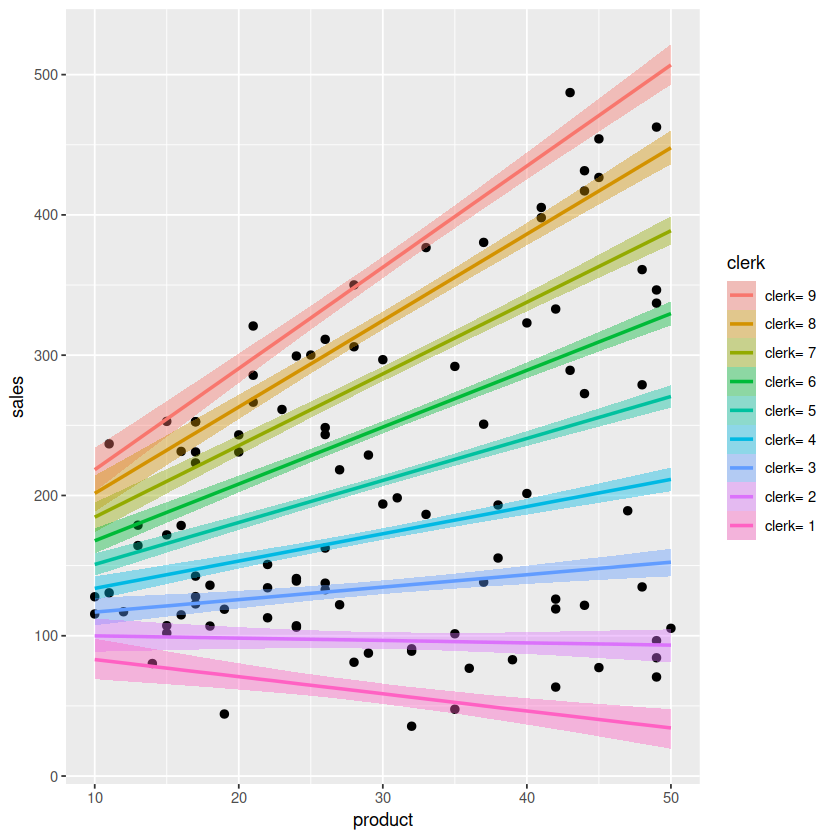

In [32]:
eff_3 <- conditional_effects(
  interaction_brms_3,
  effects = "product:clerk",
  int_conditions = int_conditions
)
plot(eff_3, points = TRUE)


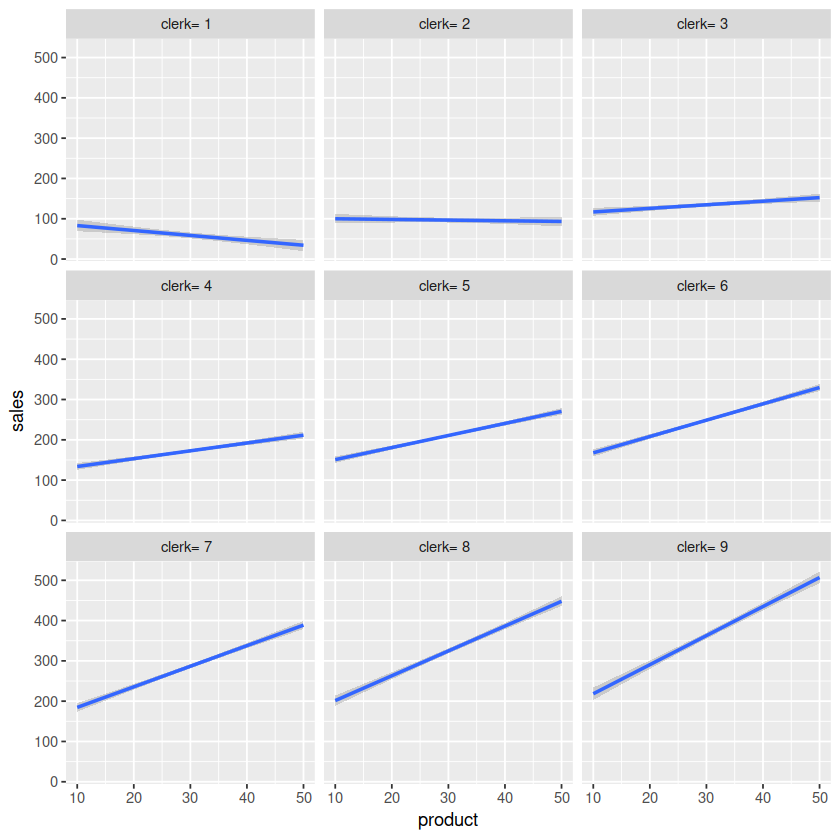

In [34]:
eff_4 <- conditional_effects(
  interaction_brms_3,
  effects = "product",
  conditions = int_conditions
)
plot(eff_4, points = FALSE)
